# Tugas 5 : Ekstraksi Keyword

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/wahyuarilsaputra/dataset/main/databerita.csv')

## Pre Processing

### Menghilangkan Data yang Kosong

In [3]:
df.isnull().sum()

Judul    1
Isi      1
Label    3
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df = df.drop_duplicates(subset=['Judul', 'Isi'])
df

,Judul,Isi,Label
0,Mahfud Md Usai Putusan MKMK Diketok: Salam Hor...,"Menteri Koordinator Bidang Politik, Hukum, dan...",Politik
1,"Waketum: Puncak HUT Golkar Acara Tunggal, Tak ...",Partai Golkar akan menggelar puncak perayaan H...,Politik
2,Pertamina Bentuk Generasi Muda Peduli Lingkung...,Pertamina bersama Subholding Refining & Petroc...,Edukasi
3,FKG UI Gelar Seminar Kesehatan Gigi-Mulut untu...,Stunting masih menjadi salah satu masalah kese...,Edukasi
4,Warga Israel Demo Desak Netanyahu Dipenjara ka...,Warga Israel melakukan unjuk rasa di depan ked...,Politik
...,...,...,...
1222,Daftar 366 Caleg DPRD Kabupaten Luwu Timur Len...,"Komisi Pemilihan Umum (KPU) Luwu Timur, Sulawe...",Politik
1223,Tekuk Salzburg Jadi Permudah Jalan Inter ke Fa...,Inter Milan harus susah payah mengalahkan Red ...,Sport
1224,Mitsubishi Pajero Didapuk Jadi Mobil Bersejarah,SUV legendaris Mitsubishi Pajero generasi pert...,Sport
1225,"Cerita Hilangnya Gitar Milik Gitaris Mocca, Bu...",Gitaris Sheila On 7 Eross Candra sempat dikaba...,Edukasi


### Cleaning Data

In [6]:
import re, string

# Text Cleaning
def cleaning(text):
    # Menghapus tag HTML
    text = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});').sub('', str(text))

    # Mengubah seluruh teks menjadi huruf kecil
    text = text.lower()

    # Menghapus spasi pada teks
    text = text.strip()

    # Menghapus Tanda Baca, karakter spesial, and spasi ganda
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub("â½ïgoal", "", text)
    text = re.sub("SCROLL TO CONTINUE WITH CONTENT", "", text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)


    # Menghapus Nomor
    text = re.sub(r'\[[0-9]*\]', ' ', text)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d', ' ', text)
    text = re.sub(r'\s+', ' ', text)

    # Mengubah text yang berisi 'nan' dengan whitespace agar nantinya dapat dihapus
    text = re.sub('nan', '', text)

    return text

In [8]:
df['Isi'] = df['Isi'].apply(lambda x: cleaning(x))

### Tokenisasi Data

In [9]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [10]:
df['isi_tokens'] = df['Isi'].apply(lambda x: word_tokenize(x))
df[["Isi", "isi_tokens"]].head()

,Isi,isi_tokens
0,menteri koordinator bidang politik hukum dan k...,"[menteri, koordinator, bidang, politik, hukum,..."
1,partai golkar akan menggelar puncak perayaan h...,"[partai, golkar, akan, menggelar, puncak, pera..."
2,pertamina bersama subholding refining petroche...,"[pertamina, bersama, subholding, refining, pet..."
3,stunting masih menjadi salah satu masalah kese...,"[stunting, masih, menjadi, salah, satu, masala..."
4,warga israel melakukan unjuk rasa di depan ked...,"[warga, israel, melakukan, unjuk, rasa, di, de..."


### StopWord Data

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
from nltk.corpus import stopwords
from itertools import chain

stop_words = set(chain(stopwords.words('indonesian')))
df['isi_tokens'] = df['isi_tokens'].apply(lambda x: [w for w in x if not w in stop_words])

In [13]:
df['Isi'] = df['isi_tokens'].apply(lambda tokens: ' '.join(tokens))

In [14]:
df.head()

,Judul,Isi,Label,isi_tokens
0,Mahfud Md Usai Putusan MKMK Diketok: Salam Hor...,menteri koordinator bidang politik hukum keama...,Politik,"[menteri, koordinator, bidang, politik, hukum,..."
1,"Waketum: Puncak HUT Golkar Acara Tunggal, Tak ...",partai golkar menggelar puncak perayaan hut pa...,Politik,"[partai, golkar, menggelar, puncak, perayaan, ..."
2,Pertamina Bentuk Generasi Muda Peduli Lingkung...,pertamina subholding refining petrochemical pt...,Edukasi,"[pertamina, subholding, refining, petrochemica..."
3,FKG UI Gelar Seminar Kesehatan Gigi-Mulut untu...,stunting salah kesehatan fokus perhatian indon...,Edukasi,"[stunting, salah, kesehatan, fokus, perhatian,..."
4,Warga Israel Demo Desak Netanyahu Dipenjara ka...,warga israel unjuk kediaman perdana menteri pm...,Politik,"[warga, israel, unjuk, kediaman, perdana, ment..."


## Co-Occurency Matriks

In [15]:
df['Isi'][0]

'menteri koordinator bidang politik hukum keama menko polhukam mahfud md menyambut putusan etik majelis kehormatan mahkamah konstitusi mkmk mantan hakim mk menaruh hormat pendahulunya jimly asshiddiqie ketua mkmk sedih malu hakim ketua mk mkmk mengeluarkan putusan pelanggaran etik hakim konstitusi bangga mk guardian of constitution salam hormat jimly bintan wahiduddin tulis mahfud akun x mohmahfudmd selasa mkmk jimly ketua wahiduddin adams bintan r saragih jimly ketua mk pendahulu mahfud ahli hukum bergelar profesor scroll to continue with content perkara diputus mkmk dugaan pelanggaran etik putusan usia capres cawapres dibacakan mk oktober etik disoal berkutat anwar usman ketua mk ipar presiden jokowi ayah salah tokoh potensial cawapres gibran rakabuming raka mkmk membacakan putusan nomor mkmk l putusan terkait dugaan pelanggaran etik hakim mahkamah konstitusi terlapor ketua mk anwar usman hakim terlapor terbukti pelanggaran berat ketua mkmk jimly asshiddiqie membacakan putusannya san

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer=lambda x: x.split())
X = vectorizer.fit_transform([df['Isi'][0]])

co_occurrence_matrix = (X.T * X)
co_occurrence_matrix.setdiag(0)

co_occurrence_df = pd.DataFrame(co_occurrence_matrix.toarray(), columns=vectorizer.get_feature_names_out(),index=vectorizer.get_feature_names_out())
co_occurrence_df

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,adams,administrative,advokasi,advokat,ahli,akun,alamsyah,anwar,asshiddiqie,ayah,...,tumpak,unusia,usia,usman,video,wahiduddin,with,x,yusuf,zico
adams,0,1,1,1,1,1,1,3,2,1,...,1,1,1,3,2,2,1,1,1,1
administrative,1,0,1,1,1,1,1,3,2,1,...,1,1,1,3,2,2,1,1,1,1
advokasi,1,1,0,1,1,1,1,3,2,1,...,1,1,1,3,2,2,1,1,1,1
advokat,1,1,1,0,1,1,1,3,2,1,...,1,1,1,3,2,2,1,1,1,1
ahli,1,1,1,1,0,1,1,3,2,1,...,1,1,1,3,2,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wahiduddin,2,2,2,2,2,2,2,6,4,2,...,2,2,2,6,4,0,2,2,2,2
with,1,1,1,1,1,1,1,3,2,1,...,1,1,1,3,2,2,0,1,1,1
x,1,1,1,1,1,1,1,3,2,1,...,1,1,1,3,2,2,1,0,1,1
yusuf,1,1,1,1,1,1,1,3,2,1,...,1,1,1,3,2,2,1,1,0,1


### Graph Co-occurency

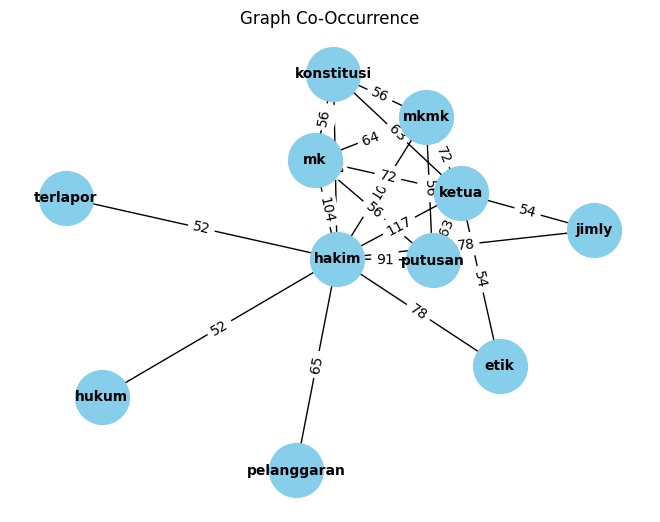

In [20]:
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
G = nx.Graph()
for idx, row in co_occurrence_df.iterrows():
    for col in co_occurrence_df.columns:
        weight = co_occurrence_df.loc[idx, col]
        if weight > 50 and idx != col:
            G.add_edge(idx, col, weight=weight)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', node_size=1500, edge_color='black', linewidths=1, font_size=10)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Graph Co-Occurrence')
plt.show()

## Closeness Centrality

In [24]:
closeness_centrality = nx.closeness_centrality(G)
print("Closeness Centrality:")
for node, closeness in sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True):
    print(f"{node}: {closeness}")

Closeness Centrality:
hakim: 1.0
ketua: 0.7692307692307693
mk: 0.6666666666666666
mkmk: 0.6666666666666666
konstitusi: 0.625
putusan: 0.625
etik: 0.5555555555555556
jimly: 0.5555555555555556
hukum: 0.5263157894736842
pelanggaran: 0.5263157894736842
terlapor: 0.5263157894736842


## PageRank Centrality

In [25]:
pagerank = nx.pagerank(G)
print("\nPageRank:")
for node, rank in sorted(pagerank.items(), key=lambda x: x[1], reverse=True):
    print(f"{node}: {rank}")


PageRank:
hakim: 0.27290389111241725
ketua: 0.15270814369232177
mk: 0.10870842519213564
mkmk: 0.10870842519213564
konstitusi: 0.08492860826596063
putusan: 0.08492860826596063
etik: 0.049543348548932435
jimly: 0.049543348548932435
pelanggaran: 0.03175871374102233
hukum: 0.028134243720090595
terlapor: 0.028134243720090595


## Rangking Kata Penting dari hasil Centrality

In [30]:
df['Isi'][0]

'menteri koordinator bidang politik hukum keama menko polhukam mahfud md menyambut putusan etik majelis kehormatan mahkamah konstitusi mkmk mantan hakim mk menaruh hormat pendahulunya jimly asshiddiqie ketua mkmk sedih malu hakim ketua mk mkmk mengeluarkan putusan pelanggaran etik hakim konstitusi bangga mk guardian of constitution salam hormat jimly bintan wahiduddin tulis mahfud akun x mohmahfudmd selasa mkmk jimly ketua wahiduddin adams bintan r saragih jimly ketua mk pendahulu mahfud ahli hukum bergelar profesor scroll to continue with content perkara diputus mkmk dugaan pelanggaran etik putusan usia capres cawapres dibacakan mk oktober etik disoal berkutat anwar usman ketua mk ipar presiden jokowi ayah salah tokoh potensial cawapres gibran rakabuming raka mkmk membacakan putusan nomor mkmk l putusan terkait dugaan pelanggaran etik hakim mahkamah konstitusi terlapor ketua mk anwar usman hakim terlapor terbukti pelanggaran berat ketua mkmk jimly asshiddiqie membacakan putusannya san

In [29]:
ranking_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Ranking Kata pada dokumen ini:")
for i, (node, closeness) in enumerate(ranking_closeness, 1):
    print(f"Rank {i}: Kata {node} nilai {closeness}")

Ranking Kata pada dokumen ini:
Rank 1: Kata hakim nilai 1.0
Rank 2: Kata ketua nilai 0.7692307692307693
Rank 3: Kata mk nilai 0.6666666666666666
Rank 4: Kata mkmk nilai 0.6666666666666666
Rank 5: Kata konstitusi nilai 0.625
Rank 6: Kata putusan nilai 0.625
Rank 7: Kata etik nilai 0.5555555555555556
Rank 8: Kata jimly nilai 0.5555555555555556
Rank 9: Kata hukum nilai 0.5263157894736842
Rank 10: Kata pelanggaran nilai 0.5263157894736842
